This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<Variable path=sequential_1/dense_2/kernel, shape=(3, 64), dtype=float32, value=[[ 0.28781587  0.29752076  0.05807331  0.2069996   0.01297989 -0.2196786
    0.2592244   0.07990518  0.27337497 -0.18049537  0.01298866 -0.18536761
   -0.00197262 -0.0977571  -0.21831271 -0.28383547 -0.28513336  0.0682677
    0.04966465  0.24055272  0.21664011 -0.12287426  0.11205542 -0.1064565
   -0.22428772  0.04904151 -0.21475512  0.28116405  0.2868995  -0.06346561
   -0.07332332  0.21716952  0.01999953 -0.11087775 -0.16515867 -0.07355513
    0.05804741 -0.24316502 -0.14205873 -0.17926249  0.05702558  0.13297918
    0.15063861  0.2604717  -0.2678784   0.17352107  0.14206785 -0.24492067
   -0.29920956  0.05879763 -0.05305837  0.09528506 -0.25892854 -0.13433008
   -0.00100908  0.15129188  0.04362237  0.17446822  0.2898655   0.15914008
   -0.29676962 -0.00345406  0.2557587   0.19106907]
  [ 0.15864602 -0.28935185  0.02562827 -0.15224707  0.00399867 -0.15454559
   -0.28027347  0.16927007  0.2132166  -0.2177

**The summary method**

In [4]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Naming models and layers with the `name` argument**

In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Specifying the input shape of your model in advance**

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

(None, 3)

In [12]:
inputs.dtype

'float32'

In [13]:
features = layers.Dense(64, activation="relu")(inputs)

In [14]:
features.shape

(None, 64)

In [15]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [17]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [18]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - department_accuracy: 0.2958 - department_loss: 28.8634 - loss: 29.1585 - priority_loss: 0.2951 - priority_mean_absolute_error: 0.4649
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - department_accuracy: 0.2422 - department_loss: 16.9842 - loss: 17.3118 - priority_loss: 0.3276 - priority_mean_absolute_error: 0.4983
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


**Training a model by providing dicts of input & target arrays**

In [19]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - department_accuracy: 0.2626 - department_loss: 37.5911 - loss: 37.9063 - priority_loss: 0.3151 - priority_mean_absolute_error: 0.4899
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - department_accuracy: 0.1485 - department_loss: 20.8765 - loss: 21.2041 - priority_loss: 0.3276 - priority_mean_absolute_error: 0.4983
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


#### The power of the Functional API: Access to layer connectivity

In [20]:
keras.utils.plot_model(model, "ticket_classifier.png")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [21]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


**Retrieving the inputs or outputs of a layer in a Functional model**

In [22]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [23]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=tags>]

In [24]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_14>

**Creating a new model by reusing intermediate layer outputs**

In [25]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

In [26]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [27]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [28]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [29]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2228 - categorical_crossentropy_loss: 45.7884 - loss: 46.1075 - mean_absolute_error: 0.4901 - mean_squared_error_loss: 0.3191
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0579 - categorical_crossentropy_loss: 29.9462 - loss: 30.2772 - mean_absolute_error: 0.5017 - mean_squared_error_loss: 0.3310
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [30]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [31]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [32]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8669 - loss: 0.4459 - val_accuracy: 0.9593 - val_loss: 0.1403
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9513 - loss: 0.1698 - val_accuracy: 0.9672 - val_loss: 0.1160
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9614 - loss: 0.1286 - val_accuracy: 0.9709 - val_loss: 0.1064
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9716 - loss: 0.1102
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [33]:
from keras import ops
class RootMeanSquaredError(keras.metrics.Metric): #1
  def __init__(self, name="rmse", **kwargs): #2
    super().__init__(name=name, **kwargs) #2
    self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros") #2
    self.total_samples = self.add_weight( #2
      name="total_samples", initializer="zeros") #2

  def update_state(self, y_true, y_pred, sample_weight=None): #3
    y_true = ops.one_hot(y_true, num_classes=ops.shape(y_pred)[1]) #3
    mse = ops.sum(ops.square(y_true - y_pred)) #3
    self.mse_sum.assign_add(mse) #3
    num_samples = ops.shape(y_pred)[0] #3
    self.total_samples.assign_add(num_samples) #3

  def result(self):
    return ops.sqrt(self.mse_sum / self.total_samples)

  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)

In [34]:
m = RootMeanSquaredError()
m.update_state(np.array([0, 1]), np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]]))
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9656603932380676>

In [35]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8623 - loss: 0.4566 - rmse: 0.4422 - val_accuracy: 0.9592 - val_loss: 0.1371 - val_rmse: 0.2469
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9523 - loss: 0.1629 - rmse: 0.2698 - val_accuracy: 0.9679 - val_loss: 0.1139 - val_rmse: 0.2229
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9630 - loss: 0.1316 - rmse: 0.2384 - val_accuracy: 0.9731 - val_loss: 0.1076 - val_rmse: 0.2071
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9676 - loss: 0.1213 - rmse: 0.2240


In [36]:
model = get_mnist_model()
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy(), RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.4462 - rmse: 0.4352 - sparse_categorical_accuracy: 0.8662 - val_loss: 0.1351 - val_rmse: 0.2440 - val_sparse_categorical_accuracy: 0.9617
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.1615 - rmse: 0.2689 - sparse_categorical_accuracy: 0.9522 - val_loss: 0.1129 - val_rmse: 0.2197 - val_sparse_categorical_accuracy: 0.9680
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.1221 - rmse: 0.2335 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.1039 - val_rmse: 0.2096 - val_sparse_categorical_accuracy: 0.9723
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1089 - rmse: 0.2196 - sparse_categorical_accuracy: 0.9682


In [37]:
m = RootMeanSquaredError()
m.update_state(np.array([1, 1]), np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]]))
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.18027755618095398>

In [38]:
m = keras.metrics.SparseCategoricalCrossentropy()
m.update_state(np.array([1, 1]), np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]]))
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.13721847534179688>

In [39]:
m.update_state(train_labels[:5], model.predict(train_images[:5]))
m.result()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.04706611856818199>

In [40]:
m = keras.metrics.SparseCategoricalAccuracy()
m.update_state(train_labels[:5], model.predict(train_images[:5]))
m.result()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [41]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2, # if validation accuracy don't imporved 2 times, stop
    ),
    keras.callbacks.ModelCheckpoint( # refer https://keras.io/api/callbacks/model_checkpoint/
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,# save best one
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels)) # validation accuracy decreasing don't happened here. so, don't eartly stop
# save model with minimum validation loss

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8597 - loss: 0.4592 - val_accuracy: 0.9581 - val_loss: 0.1525
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9505 - loss: 0.1728 - val_accuracy: 0.9691 - val_loss: 0.1112
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9650 - loss: 0.1266 - val_accuracy: 0.9732 - val_loss: 0.1021
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9663 - loss: 0.1165 - val_accuracy: 0.9730 - val_loss: 0.0984
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9725 - loss: 0.1015 - val_accuracy: 0.9764 - val_loss: 0.0932
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9740 - loss: 0.0956 - val_accuracy: 0.9784 - val_loss: 0.0944
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9770 - loss: 0.0864 - val_accuracy: 0.9790 - val_loss: 0.0910
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9781 -

In [42]:
model = keras.models.load_model("checkpoint_path.keras")# load model with minimum validation loss

In [45]:
model.evaluate(val_images, val_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9736 - loss: 0.1004


[0.10501974076032639, 0.9713000059127808]

working with different parameters

In [48]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=1, # if validation accuracy don't imporved 2 times, stop
    ),
    keras.callbacks.ModelCheckpoint( # refer https://keras.io/api/callbacks/model_checkpoint/
        filepath="checkpoint_path{epoch:02d}.keras" # save all model
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels)) # validation accuracy decreasing don't happened here. so, don't eartly stop
# save model with minimum validation loss

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8617 - loss: 0.4546 - val_accuracy: 0.9590 - val_loss: 0.1438
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9521 - loss: 0.1673 - val_accuracy: 0.9688 - val_loss: 0.1169
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9622 - loss: 0.1315 - val_accuracy: 0.9717 - val_loss: 0.1062
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9690 - loss: 0.1089 - val_accuracy: 0.9749 - val_loss: 0.0940
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9715 - loss: 0.1023 - val_accuracy: 0.9766 - val_loss: 0.0905
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9745 - loss: 0.0906 - val_accuracy: 0.9772 - val_loss: 0.0908
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9773 - loss: 0.0825 - val_accuracy: 0.9766 - val_loss: 0.0962


### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [49]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8623 - loss: 0.4529 - val_accuracy: 0.9560 - val_loss: 0.1541
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9516 - loss: 0.1657 - val_accuracy: 0.9671 - val_loss: 0.1218
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9648 - loss: 0.1285 - val_accuracy: 0.9694 - val_loss: 0.1061
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9687 - loss: 0.1133 - val_accuracy: 0.9740 - val_loss: 0.0978
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9722 - loss: 0.1022 - val_accuracy: 0.9754 - val_loss: 0.0972
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9743 - loss: 0.0936 - val_accuracy: 0.9775 - val_loss: 0.1017
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9768 - loss: 0.0855 - val_accuracy: 0.9792 - val_loss: 0.0899
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9787 - l

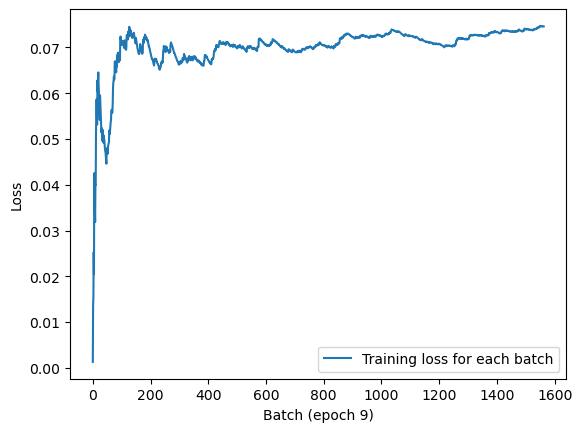

In [50]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [51]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tensorboard_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8660 - loss: 0.4507 - val_accuracy: 0.9588 - val_loss: 0.1438
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9516 - loss: 0.1671 - val_accuracy: 0.9669 - val_loss: 0.1198
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9617 - loss: 0.1349 - val_accuracy: 0.9711 - val_loss: 0.1059
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9671 - loss: 0.1127 - val_accuracy: 0.9726 - val_loss: 0.1079
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9709 - loss: 0.1042 - val_accuracy: 0.9766 - val_loss: 0.0927
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9748 - loss: 0.0906 - val_accuracy: 0.9760 - val_loss: 0.0992
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9765 - loss: 0.0828 - val_accuracy: 0.9764 - val_loss: 0.0990
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9774 -

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./tensorboard_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [52]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [53]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [57]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [58]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [60]:
import tensorflow as tf

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

## Summary